In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from data_preprocessing import *
from implementation import *
from helpers import *
from plot import *

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

### Using pandas to see the pattern in the data. Note that the use of pandas is not included in other analysis and only for eda purposes.

In [4]:
import pandas as pd
data = pd.read_csv(DATA_TRAIN_PATH)
data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
data['PRI_jet_num'].describe()

count    250000.000000
mean          0.979176
std           0.977426
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: PRI_jet_num, dtype: float64

In [6]:
data['Prediction'] = [1 if x == 's' else 0 for x in data['Prediction']]

In [7]:
data_0 = data[data['PRI_jet_num'] == 0]
data_1 = data[data['PRI_jet_num'] == 1]
data_2 = data[data['PRI_jet_num'] == 2]
data_3 = data[data['PRI_jet_num'] == 3]

In [8]:
data_0.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.0,99913.0,99913.0,99913.000000,...,99913.000000,99913.00000,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0,99913.0
mean,224892.549558,0.255142,-172.077816,58.786239,81.870309,13.823867,-999.0,-999.0,-999.0,2.664961,...,-0.024443,125.86081,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
std,72138.199984,0.435943,494.022274,32.003551,38.043669,16.674707,0.0,0.0,0.0,0.693295,...,1.811006,53.08660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100003.000000,0.000000,-999.000000,0.002000,7.120000,0.000000,-999.0,-999.0,-999.0,0.277000,...,-3.142000,13.67800,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
25%,162434.000000,0.000000,-999.000000,35.062000,60.947000,2.275000,-999.0,-999.0,-999.0,2.338000,...,-1.583000,87.95100,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
50%,224898.000000,0.000000,96.528000,62.144000,75.533000,6.677000,-999.0,-999.0,-999.0,2.822000,...,-0.051000,119.47900,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
75%,287392.000000,1.000000,126.793000,79.650000,94.135000,24.202000,-999.0,-999.0,-999.0,3.095000,...,1.546000,156.41800,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
max,349999.000000,1.000000,863.647000,570.115000,1349.351000,2834.999000,-999.0,-999.0,-999.0,5.684000,...,3.142000,1391.52900,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [9]:
data_0

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
3,100003,0,143.905,81.417,80.943,0.414,-999.0,-999.0,-999.0,3.310,...,0.060,86.062,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
4,100004,0,175.864,16.915,134.805,16.405,-999.0,-999.0,-999.0,3.891,...,-0.871,53.131,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
8,100008,0,105.594,50.559,100.989,4.288,-999.0,-999.0,-999.0,2.904,...,0.024,129.804,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
10,100010,0,-999.000,86.240,79.692,27.201,-999.0,-999.0,-999.0,2.338,...,0.688,250.178,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
13,100013,0,82.488,31.663,64.128,8.232,-999.0,-999.0,-999.0,2.823,...,1.433,163.420,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249990,349990,0,127.822,82.865,100.024,0.860,-999.0,-999.0,-999.0,3.210,...,2.674,120.320,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
249995,349995,0,-999.000,71.989,36.548,5.042,-999.0,-999.0,-999.0,1.392,...,2.859,144.665,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
249996,349996,0,-999.000,58.179,68.083,22.439,-999.0,-999.0,-999.0,2.585,...,-0.867,80.408,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0
249998,349998,0,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,...,0.811,112.718,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0


In [10]:
data_0 = data_0.loc[:, np.array(data_0.describe().loc['mean'] != -999)]

In [11]:
data_0.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
count,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,...,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.000000,99913.00000,99913.0,99913.0
mean,224892.549558,0.255142,-172.077816,58.786239,81.870309,13.823867,2.664961,13.823867,76.377011,1.392763,...,-0.024858,-0.015657,42.364287,-0.052311,0.042352,31.536761,-0.024443,125.86081,0.0,0.0
std,72138.199984,0.435943,494.022274,32.003551,38.043669,16.674707,0.693295,16.674707,23.561057,0.581596,...,1.233430,1.817351,14.585979,1.310855,1.817844,20.294541,1.811006,53.08660,0.0,0.0
min,100003.000000,0.000000,-999.000000,0.002000,7.120000,0.000000,0.277000,0.000000,46.104000,0.127000,...,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.67800,0.0,0.0
25%,162434.000000,0.000000,-999.000000,35.062000,60.947000,2.275000,2.338000,2.275000,61.297000,0.968000,...,-0.960000,-1.586000,31.863000,-1.121000,-1.526000,18.001000,-1.583000,87.95100,0.0,0.0
50%,224898.000000,0.000000,96.528000,62.144000,75.533000,6.677000,2.822000,6.677000,71.586000,1.318000,...,-0.043000,-0.049000,38.969000,-0.104000,0.085000,29.538000,-0.051000,119.47900,0.0,0.0
75%,287392.000000,1.000000,126.793000,79.650000,94.135000,24.202000,3.095000,24.202000,85.242000,1.728000,...,0.900000,1.556000,49.007000,0.989000,1.621000,42.273000,1.546000,156.41800,0.0,0.0
max,349999.000000,1.000000,863.647000,570.115000,1349.351000,2834.999000,5.684000,2834.999000,1324.678000,10.571000,...,2.494000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,1391.52900,0.0,0.0


In [12]:
data_1.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,77544.000000,77544.000000,77544.000000,77544.00000,77544.000000,77544.000000,77544.0,77544.0,77544.0,77544.000000,...,77544.000000,77544.000000,77544.0,77544.000000,77544.000000,77544.000000,77544.0,77544.0,77544.0,77544.000000
mean,225144.066040,0.357346,12.845744,46.05360,82.219033,65.903090,-999.0,-999.0,-999.0,2.339686,...,-0.005579,203.324833,1.0,65.012163,-0.000800,-0.015052,-999.0,-999.0,-999.0,65.012163
std,72137.275981,0.479221,337.359355,35.58119,42.288122,47.431007,0.0,0.0,0.0,0.737633,...,1.811937,81.901141,0.0,45.154510,1.821593,1.817529,0.0,0.0,0.0,45.154510
min,100001.000000,0.000000,-999.000000,0.00000,6.329000,0.000000,-999.0,-999.0,-999.0,0.208000,...,-3.141000,21.066000,1.0,30.000000,-4.499000,-3.142000,-999.0,-999.0,-999.0,30.000000
25%,162817.750000,0.000000,84.531750,16.26750,59.809750,37.131000,-999.0,-999.0,-999.0,1.855000,...,-1.579000,148.362000,1.0,37.529000,-1.346000,-1.594000,-999.0,-999.0,-999.0,37.529000
50%,225049.500000,0.000000,107.934500,40.49850,73.936000,53.081000,-999.0,-999.0,-999.0,2.404000,...,-0.011000,189.476000,1.0,49.974000,-0.002000,-0.039000,-999.0,-999.0,-999.0,49.974000
75%,287516.500000,1.000000,132.932500,70.01300,92.679750,79.002000,-999.0,-999.0,-999.0,2.855000,...,1.568000,240.657750,1.0,74.592250,1.347000,1.564000,-999.0,-999.0,-999.0,74.592250
max,349997.000000,1.000000,1192.026000,571.86800,959.601000,753.745000,-999.0,-999.0,-999.0,5.655000,...,3.142000,1383.552000,1.0,743.222000,4.492000,3.141000,-999.0,-999.0,-999.0,743.222000


In [13]:
data_1 = data_1.loc[:, np.array(data_1.describe().loc['mean'] != -999)]

In [14]:
data_1.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_all_pt
count,77544.000000,77544.000000,77544.000000,77544.00000,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000,...,77544.000000,77544.000000,77544.000000,77544.000000,77544.000000,77544.0,77544.000000,77544.000000,77544.000000,77544.000000
mean,225144.066040,0.357346,12.845744,46.05360,82.219033,65.903090,2.339686,16.645000,150.368035,1.444185,...,0.006686,0.044894,40.123371,-0.005579,203.324833,1.0,65.012163,-0.000800,-0.015052,65.012163
std,72137.275981,0.479221,337.359355,35.58119,42.288122,47.431007,0.737633,17.007924,65.182087,0.846425,...,1.262214,1.815456,28.357324,1.811937,81.901141,0.0,45.154510,1.821593,1.817529,45.154510
min,100001.000000,0.000000,-999.000000,0.00000,6.329000,0.000000,0.208000,0.000000,77.017000,0.083000,...,-2.494000,-3.142000,0.251000,-3.141000,21.066000,1.0,30.000000,-4.499000,-3.142000,30.000000
25%,162817.750000,0.000000,84.531750,16.26750,59.809750,37.131000,1.855000,2.895000,110.752750,0.867750,...,-0.975000,-1.522000,21.800750,-1.579000,148.362000,1.0,37.529000,-1.346000,-1.594000,37.529000
50%,225049.500000,0.000000,107.934500,40.49850,73.936000,53.081000,2.404000,10.705000,132.326500,1.268000,...,0.016000,0.094000,34.568500,-0.011000,189.476000,1.0,49.974000,-0.002000,-0.039000,49.974000
75%,287516.500000,1.000000,132.932500,70.01300,92.679750,79.002000,2.855000,26.214250,167.624000,1.797000,...,0.984250,1.618250,51.069000,1.568000,240.657750,1.0,74.592250,1.347000,1.564000,74.592250
max,349997.000000,1.000000,1192.026000,571.86800,959.601000,753.745000,5.655000,330.527000,1214.932000,16.776000,...,2.502000,3.142000,536.468000,3.142000,1383.552000,1.0,743.222000,4.492000,3.141000,743.222000


In [15]:
data_2.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,...,50379.000000,50379.000000,50379.0,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000,50379.000000
mean,225129.697374,0.510808,56.928924,38.343612,79.213348,102.985028,2.606534,391.406450,-1.115458,2.060607,...,0.003340,296.011170,2.0,98.470208,-0.002448,-0.013290,51.709866,-0.013631,0.006144,150.180076
std,72182.186996,0.499888,268.937491,35.273944,39.917128,70.529284,1.812621,426.852418,3.821072,0.759354,...,1.814845,111.483795,0.0,61.866979,1.814152,1.809918,25.460068,2.134823,1.817867,77.646249
min,100000.000000,0.000000,-999.000000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,...,-3.142000,34.323000,2.0,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000
25%,162596.500000,0.000000,91.593500,11.605500,58.525000,54.065500,0.984000,106.676000,-3.251000,1.485000,...,-1.560500,220.219000,2.0,56.617500,-1.416000,-1.578000,35.245500,-1.757000,-1.568500,96.911500
50%,225414.000000,1.000000,112.991000,28.501000,72.270000,87.682000,2.383000,228.643000,-0.465000,2.020000,...,-0.003000,274.747000,2.0,80.543000,0.015000,-0.032000,43.551000,-0.013000,0.012000,128.486000
75%,287655.500000,1.000000,132.447500,56.512000,89.505500,134.134500,4.004000,513.674500,0.869000,2.632000,...,1.576000,346.437000,2.0,120.356000,1.403000,1.553000,58.712500,1.725000,1.589000,179.995500
max,349994.000000,1.000000,966.986000,595.819000,1051.358000,1053.807000,8.503000,4974.979000,16.690000,5.579000,...,3.142000,1364.632000,2.0,1120.573000,4.499000,3.141000,464.262000,4.500000,3.142000,1173.613000


In [16]:
data_3.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.00000,...,22164.000000,22164.000000,22164.0,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000,22164.000000
mean,224679.896003,0.303691,48.407703,42.120203,78.925522,126.066343,1.942770,327.179877,-0.153947,1.88462,...,0.007977,414.852725,3.0,123.107808,-0.013810,-0.001050,71.248456,-0.007787,-0.019144,255.320458
std,72390.704166,0.459861,288.136803,38.075038,48.790879,83.821859,1.469926,317.279844,2.867334,0.82726,...,1.812382,158.829033,0.0,76.313756,1.573264,1.806774,40.126329,1.775354,1.814782,128.454234
min,100005.000000,0.000000,-999.000000,0.000000,10.342000,0.777000,0.000000,17.084000,-15.347000,0.37900,...,-3.141000,22.710000,3.0,31.266000,-4.439000,-3.141000,30.235000,-4.491000,-3.142000,92.812000
25%,161858.000000,0.000000,84.995500,13.425750,54.037250,65.497750,0.714000,123.789750,-1.345250,1.23000,...,-1.548000,306.536250,3.0,71.515250,-1.179250,-1.559000,46.006750,-1.326000,-1.593250,167.900500
50%,224412.500000,0.000000,104.558500,32.165000,67.991000,108.909000,1.634500,221.334500,-0.015000,1.76700,...,0.009000,382.921500,3.0,101.681500,-0.022500,-0.018000,59.799500,0.000000,-0.041000,222.157500
75%,287699.750000,1.000000,130.189750,62.188000,87.763250,166.420250,2.877000,411.927000,1.119250,2.49100,...,1.562250,486.144500,3.0,150.187250,1.163250,1.578000,82.940750,1.326000,1.548000,304.904000
max,349993.000000,1.000000,988.199000,690.075000,1329.913000,762.806000,7.877000,4062.147000,14.772000,5.50500,...,3.141000,2003.976000,3.0,760.846000,4.476000,3.141000,721.456000,4.500000,3.141000,1633.433000


### Categorize the data and remove columns

In [17]:
(y_0, tX_0, ids_0), (y_1, tX_1, ids_1), (y_2, tX_2, ids_2), (y_3, tX_3, ids_3) = categorize(y, tX, ids)

In [18]:
tX_0 = remove_uniform_col(tX_0)
tX_1 = remove_uniform_col(tX_1)
tX_2 = remove_uniform_col(tX_2)
tX_3 = remove_uniform_col(tX_3)

non_correlated_col_0 = non_correlated_col(tX_0)
non_correlated_col_1 = non_correlated_col(tX_1)
non_correlated_col_2 = non_correlated_col(tX_2)
non_correlated_col_3 = non_correlated_col(tX_3)

In [19]:
tX_1.shape

(77544, 22)

### Cleaning, removing outliers, and standardize (not used)

In [20]:
y_0 = change_y(y_0)
y_1 = change_y(y_1)
y_2 = change_y(y_2)
y_3 = change_y(y_3)

x_0, mean_x_0, std_x_0 = clean(tX_0)
y_0, x_0 = remove_outliers(y_0, x_0, mean_x_0, std_x_0)
x_0 = x_0[:, non_correlated_col_0]
# x_0 = standardize(x_0, mean_x_0, std_x_0)

x_1, mean_x_1, std_x_1 = clean(tX_1)
y_1, x_1 = remove_outliers(y_1, x_1, mean_x_1, std_x_1)
x_1 = x_1[:, non_correlated_col_1]
# x_1 = standardize(x_1, mean_x_1, std_x_1)

x_2, mean_x_2, std_x_2 = clean(tX_2)
y_2, x_2 = remove_outliers(y_2, x_2, mean_x_2, std_x_2)
x_2 = x_2[:, non_correlated_col_2]
# x_2 = standardize(x_2, mean_x_2, std_x_2)

x_3, mean_x_3, std_x_3 = clean(tX_3)
y_3, x_3 = remove_outliers(y_3, x_3, mean_x_3, std_x_3)
x_3 = x_3[:, non_correlated_col_3]
# x_3 = standardize(x_3, mean_x_3, std_x_3)

### Least squares

In [21]:
_, weight_0 = least_squares(y_0, x_0)
y_pred_0 = predict_labels(weight_0, x_0)

_, weight_1 = least_squares(y_1, x_1)
y_pred_1 = predict_labels(weight_1, x_1)

_, weight_2 = least_squares(y_2, x_2)
y_pred_2 = predict_labels(weight_2, x_2)

_, weight_3 = least_squares(y_3, x_3)
y_pred_3 = predict_labels(weight_3, x_3)

In [22]:
y_pred = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3), axis=0)
y_label = np.concatenate((y_0, y_1, y_2, y_3), axis=0)

In [23]:
accuracy_score(y_pred, y_label)

0.7691361562369123

### Ridge Regression

In [24]:
### cross Validation to find lambda
lambdas = np.logspace(-4, 0, 30)

accuracies_0 = ridge_cross_validation(y_0, x_0, lambdas)
accuracies_1 = ridge_cross_validation(y_1, x_1, lambdas)
accuracies_2 = ridge_cross_validation(y_2, x_2, lambdas)
accuracies_3 = ridge_cross_validation(y_3, x_3, lambdas)

accuracies = np.array([accuracies_0, accuracies_1, accuracies_2, accuracies_3])

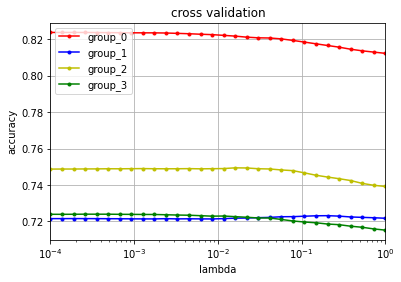

In [25]:
ridge_cross_validation_visualization(lambdas, accuracies)

In [26]:
### select lambdas with the highest average accuracy
best_lambda = lambdas[np.argmax(np.mean(accuracies, axis=0))]
print(best_lambda)

0.0002592943797404667


In [27]:
_, weight_0 = ridge_regression(y_0, x_0, best_lambda)
y_pred_0 = predict_labels(weight_0, x_0)

_, weight_1 = ridge_regression(y_1, x_1, best_lambda)
y_pred_1 = predict_labels(weight_1, x_1)

_, weight_2 = ridge_regression(y_2, x_2, best_lambda)
y_pred_2 = predict_labels(weight_2, x_2)

_, weight_3 = ridge_regression(y_3, x_3, best_lambda)
y_pred_3 = predict_labels(weight_3, x_3)

In [28]:
y_pred = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3), axis=0)
y_label = np.concatenate((y_0, y_1, y_2, y_3), axis=0)

In [29]:
accuracy_score(y_pred, y_label)

0.7692111005797165

### Add polynomial basis

In [ ]:
polys = np.arange(1, 13)

accuracies_0 = poly_cross_validation(y_0, x_0, best_lambda, polys)
accuracies_1 = poly_cross_validation(y_1, x_1, best_lambda, polys)
accuracies_2 = poly_cross_validation(y_2, x_2, best_lambda, polys)
accuracies_3 = poly_cross_validation(y_3, x_3, best_lambda, polys)

accuracies = np.array([accuracies_0, accuracies_1, accuracies_2, accuracies_3])

In [ ]:
poly_cross_validation_visualization(polys, accuracies)

In [ ]:
best_degree_0 = polys[np.argmax(accuracies_0)]
best_degree_1 = polys[np.argmax(accuracies_1)]
best_degree_2 = polys[np.argmax(accuracies_2)]
best_degree_3 = polys[np.argmax(accuracies_3)]
print(best_degree_0, best_degree_1, best_degree_2, best_degree_3)

In [ ]:
# we choose a degree of 6 to have substantial performance while avoiding overfitting
x_0 = build_poly(x_0, 6)
x_1 = build_poly(x_1, 6)
x_2 = build_poly(x_2, 6)
x_3 = build_poly(x_3, 6)

In [ ]:
# using ridge regression
_, weight_0 = ridge_regression(y_0, x_0, best_lambda)
y_pred_0 = predict_labels(weight_0, x_0)

_, weight_1 = ridge_regression(y_1, x_1, best_lambda)
y_pred_1 = predict_labels(weight_1, x_1)

_, weight_2 = ridge_regression(y_2, x_2, best_lambda)
y_pred_2 = predict_labels(weight_2, x_2)

_, weight_3 = ridge_regression(y_3, x_3, best_lambda)
y_pred_3 = predict_labels(weight_3, x_3)

In [ ]:
y_pred = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3), axis=0)
y_label = np.concatenate((y_0, y_1, y_2, y_3), axis=0)

In [ ]:
accuracy_score(y_pred, y_label)

In [ ]:
# using least squares
_, weight_0 = least_squares(y_0, x_0)
y_pred_0 = predict_labels(weight_0, x_0)

_, weight_1 = least_squares(y_1, x_1)
y_pred_1 = predict_labels(weight_1, x_1)

_, weight_2 = least_squares(y_2, x_2)
y_pred_2 = predict_labels(weight_2, x_2)

_, weight_3 = least_squares(y_3, x_3)
y_pred_3 = predict_labels(weight_3, x_3)

In [ ]:
y_pred = np.concatenate((y_pred_0, y_pred_1, y_pred_2, y_pred_3), axis=0)
y_label = np.concatenate((y_0, y_1, y_2, y_3), axis=0)

In [ ]:
accuracy_score(y_pred, y_label)

### APPYING TO TEST

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
(yt_0, tXt_0, idst_0), (yt_1, tXt_1, idst_1), (yt_2, tXt_2, idst_2), (yt_3, tXt_3, idst_3) = categorize(y_test, tX_test, ids_test)

In [ ]:
tXt_0 = remove_uniform_col(tXt_0)
tXt_1 = remove_uniform_col(tXt_1)
tXt_2 = remove_uniform_col(tXt_2)
tXt_3 = remove_uniform_col(tXt_3)

In [ ]:
yt_0 = change_y(yt_0)
yt_1 = change_y(yt_1)
yt_2 = change_y(yt_2)
yt_3 = change_y(yt_3)

xt_0, mean_xt_0, std_xt_0 = clean(tXt_0)
yt_0, xt_0 = remove_outliers(yt_0, xt_0, mean_xt_0, std_xt_0)
xt_0 = xt_0[:, non_correlated_col_0]
# x_0 = standardize(x_0, mean_x_0, std_x_0)

xt_1, mean_xt_1, std_xt_1 = clean(tXt_1)
yt_1, xt_1 = remove_outliers(yt_1, xt_1, mean_xt_1, std_xt_1)
xt_1 = xt_1[:, non_correlated_col_1]
# x_1 = standardize(x_1, mean_x_1, std_x_1)

xt_2, mean_xt_2, std_xt_2 = clean(tXt_2)
yt_2, xt_2 = remove_outliers(yt_2, xt_2, mean_xt_2, std_xt_2)
xt_2 = xt_2[:, non_correlated_col_2]
# x_2 = standardize(x_2, mean_x_2, std_x_2)

xt_3, mean_xt_3, std_xt_3 = clean(tXt_3)
yt_3, xt_3 = remove_outliers(yt_3, xt_3, mean_xt_3, std_xt_3)
xt_3 = xt_3[:, non_correlated_col_3]
# x_3 = standardize(x_3, mean_x_3, std_x_3)

In [ ]:
xt_0 = build_poly(xt_0, 6)
xt_1 = build_poly(xt_1, 6)
xt_2 = build_poly(xt_2, 6)
xt_3 = build_poly(xt_3, 6)

In [ ]:
y_predt_0 = predict_labels(weight_0, xt_0)
y_predt_1 = predict_labels(weight_1, xt_1)
y_predt_2 = predict_labels(weight_2, xt_2)
y_predt_3 = predict_labels(weight_3, xt_3)

In [ ]:
y_predt = np.concatenate((y_predt_0, y_predt_1, y_predt_2, y_predt_3), axis=0)

In [ ]:
y_predt